# <center>Data Mining Project Code</center>

** **
## <center>*03 - Customer Segmentation Notebook*</center>

** **

Consumers today are becoming more selective about where they buy their products and where they spend their money. Consequently, it is essencial for companies to better understand their clients, being able to tailor sales and discounts to certain groups of customers.

Knowing this, the goal of this project is to divide customers of `ABCDEats Inc.` into smaller groups, whose clients have similar characteristics and purchasing behaviours.

The third and final notebook of this project consists of the implementation of different Clustering Models, attempting to group customers in a way that each client is similar to the other clients in the same group, but different from other groups. To perform this task, methods such as Hierarchical Clustering, K-Means and DBScan will be implemented.

This project was presented to the `TargetSphere Advisors`, a group of Consultants, Business Analysts and Data Scientists who focus on delivering Customer Segementation solutions for small and medium-sized businesses.

The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
 
    
2. [Variable Standardization](#2.-Variable-Standardization) <br><br>

    
3. [Customer Segmentation](#3.-Customer-Segmentation)

    3.1 [Hierarchical Clustering](#3.1-Hierarchical-Clustering) <br>
    
    3.2 [K-Means](#3.2-K-Means) <br>


# 1. Importing Libraries & Data

In [16]:
import pandas as pd
import numpy as np

# scalers
from sklearn.preprocessing import RobustScaler

# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix

# visualisations
import matplotlib.pyplot as plt


In [3]:
# change data file
data = pd.read_csv('data/DM2425_ABCDEats_DATASET.csv', index_col = "customer_id")
data.head(3)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0


# 2. Variable Standardization

<a href="#top">Top &#129033;</a>

In [11]:
num_data = data.select_dtypes(include=['number'])
num_data = num_data.dropna()
num_data.head(3)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.0,2,5,1,0.0,1,0.00,0.00,0.0,0.0,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,17.0,2,2,2,0.0,1,12.82,6.39,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,38.0,1,2,2,0.0,1,9.20,0.00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# experimentar todos scalers

scaled_data = RobustScaler().fit_transform(num_data)

# 3. Customer Segmentation

<a href="#top">Top &#129033;</a>

1. Partitioning Methods
- K-means
- K-medoids

2. Hierachical
- Agglomerative, Divisive
    - linkage(s)

3. Density-Based
- DBScan (HDBSCAN for varying densities)
- Meanshift
- OPTICS

4. Model-Based (?)
- Gaussian Mixture Models
- Hidden Markov Models

5. Neural Network-based
- SOMs

6. Dimensionaility Reduction
- UMAP
- t-SNE

(future)
- PCA

7. Combos

## 3.1 Hierarchical Clustering

In [33]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_data)

**Dendrogram**

In [38]:
def plot_dendrogram(model, **kwargs):
    '''
    Create linkage matrix and then plot the dendrogram
    Arguments: 
    - model(HierarchicalClustering Model): hierarchical clustering model.
    - **kwargs
    Returns:
    None, but dendrogram plot is produced.
    '''
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    
    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

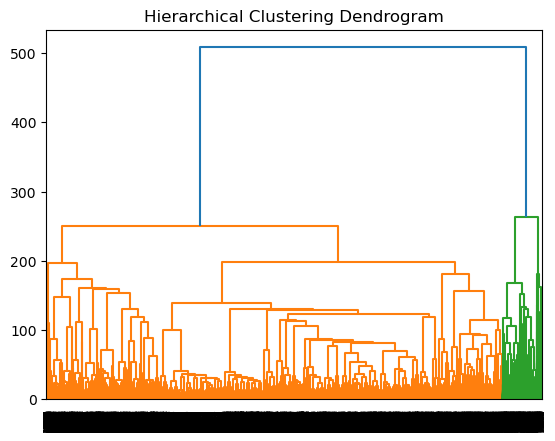

In [40]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clust, truncate_mode="level", p=50)
#plt.axhline(y = 200, color = 'r', linestyle = '-')

plt.show()


# demora um bocado a correr com p=50

## 3.2 K-Means

In [13]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

**Elbow Method**

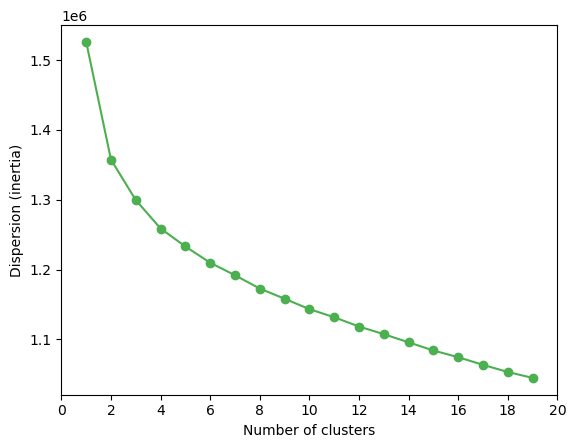

In [19]:
plt.plot(range(1, 20), dispersion, marker='o', color='#4CAF50')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


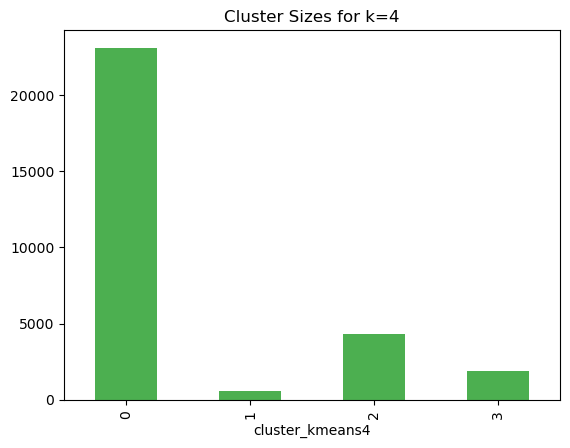

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


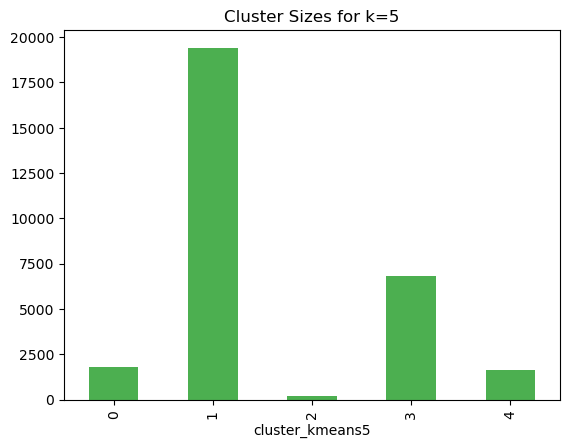

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


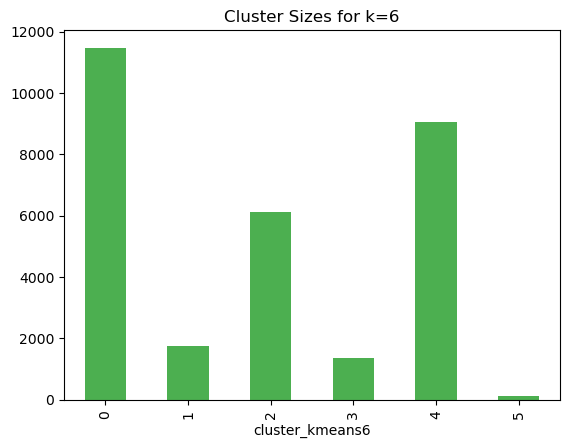

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


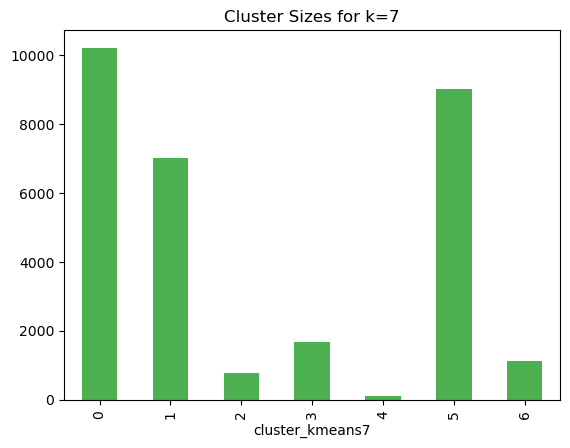

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


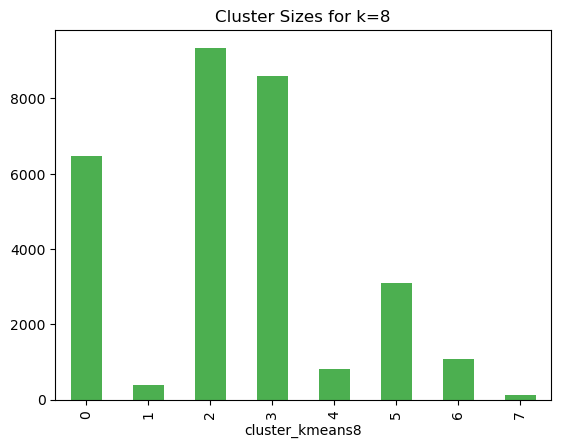

In [22]:
possible_k = [4, 5, 6, 7, 8]

for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_data)  
    clusters  = kmeans.predict(scaled_data)  
    
    num_data[f'cluster_kmeans{k}'] = clusters 
    
    num_data.groupby([f'cluster_kmeans{k}']).size().plot(kind='bar', 
                                                          color='#4CAF50') 
    plt.title(f'Cluster Sizes for k={k}')
    plt.show()

In [26]:
for k in possible_k:
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_data)  
    clusters  = kmeans.predict(scaled_data)  
    
    num_data[f'cluster_kmeans{k}'] = clusters 
    
    cluster_means = num_data.groupby([f'cluster_kmeans{k}']).mean().T
    
    print(f"Mean values for k={k}:")
    print(cluster_means)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=4:
cluster_kmeans4                   0          1          2          3
customer_age              27.484848  27.863014  27.509112  27.569700
vendor_count               2.030779  12.803082   5.887428   5.712257
product_count              3.048312  36.828767  12.084429  10.976854
is_chain                   1.524589  19.630137   6.576240   3.857969
first_order               33.632251   4.476027  11.705190  16.455024
last_order                59.054113  85.339041  78.996309  77.514992
CUI_American               2.927910  19.953390   9.188390  11.624035
CUI_Asian                  5.934703  19.253168   7.205769  51.415839
CUI_Beverages              1.441635   8.530616   2.129248  10.165245
CUI_Cafe                   0.302755  13.543784   1.999158   0.077528
CUI_Chicken Dishes         0.405797   6.307500   2.143366   0.012851
CUI_Chinese                0.699390  12.565462   3.086196   2.213235
CUI_Desserts               0.516516   1.520051   0.454344   5.306318
CUI_Healthy  

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=5:
cluster_kmeans5                   0          1          2          3  \
customer_age              27.537658  27.450847  27.273585  27.562619   
vendor_count               5.720726   1.774293  15.438679   4.155049   
product_count             11.045080   2.544364  49.976415   7.567295   
is_chain                   3.894997   1.245739  27.122642   4.015490   
first_order               16.421660  36.560791   3.377358  15.827269   
last_order                77.424959  56.354344  86.382075  75.408739   
CUI_American              11.685921   2.507895  25.275000   6.449509   
CUI_Asian                 51.847752   5.971267  23.633443   6.323095   
CUI_Beverages             10.572188   1.462854  15.055425   1.538143   
CUI_Cafe                   0.086295   0.232066  25.187925   1.089491   
CUI_Chicken Dishes         0.011759   0.307112   7.608915   1.282902   
CUI_Chinese                2.188911   0.598012  17.968821   1.713028   
CUI_Desserts               5.365723   0.551

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=6:
cluster_kmeans6                   0          1          2          3  \
customer_age              27.645721  27.568739  27.509708  27.698471   
vendor_count               1.896026   5.837422   4.499429   9.327749   
product_count              2.783598  11.283514   8.361886  22.875455   
is_chain                   1.311835   3.981175   4.490945  12.270211   
first_order               50.623932  15.699943  14.208027   6.790969   
last_order                73.826477  77.859669  76.545113  83.122360   
CUI_American               2.715179  11.963942   6.708765  15.710007   
CUI_Asian                  6.763169  52.900200   6.515275  12.854348   
CUI_Beverages              1.541208  10.518391   1.711127   3.757567   
CUI_Cafe                   0.282575   0.141666   1.206882   5.701763   
CUI_Chicken Dishes         0.276377   0.013297   1.484079   3.838143   
CUI_Chinese                0.622934   2.293554   1.955647   6.422768   
CUI_Desserts               0.609880   5.455

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=7:
cluster_kmeans7                   0          1          2          3  \
customer_age              27.584329  27.619482  27.802835  27.576414   
vendor_count               1.783252   4.067645   7.503866   5.910349   
product_count              2.588247   7.278838  22.219072  11.417569   
is_chain                   1.205877   3.861578   9.354381   4.003610   
first_order               54.232223  15.369410   7.786082  15.733454   
last_order                73.405093  76.007548  83.800258  77.934416   
CUI_American               2.447020   6.469211  21.783351  12.025048   
CUI_Asian                  6.692857   6.830423  16.688157  53.854868   
CUI_Beverages              1.523120   1.582008   0.702062  10.900247   
CUI_Cafe                   0.256544   0.967289  11.705116   0.076516   
CUI_Chicken Dishes         0.269332   1.130309   0.567668   0.013544   
CUI_Chinese                0.579017   1.632652   2.686701   2.362040   
CUI_Desserts               0.614801   0.456

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mean values for k=8:
cluster_kmeans8                   0          1          2          3  \
customer_age              27.618761  27.480418  27.552846  27.250553   
vendor_count               4.016226   9.284595   1.692769   1.699057   
product_count              7.199505  19.950392   2.407681   2.401839   
is_chain                   3.920723   6.686684   1.155862   1.259397   
first_order               15.452944   9.550914  56.221331  17.954614   
last_order                75.801885  82.741514  73.032199  35.214593   
CUI_American               6.095792  21.328303   2.292189   2.415038   
CUI_Asian                  4.849833  97.210235   5.465014   4.403963   
CUI_Beverages              1.208184  15.638329   1.085472   1.246094   
CUI_Cafe                   0.997068   0.285013   0.260472   0.229010   
CUI_Chicken Dishes         1.271015   0.007937   0.280218   0.390893   
CUI_Chinese                1.593536   2.931358   0.560032   0.603347   
CUI_Desserts               0.264446  10.696